In [662]:
# Wine Quality Classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import zscore
from scipy import stats
from sklearn import metrics, tree ,svm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier




In [663]:
# Reading the dataset
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
print(df.shape)


(1599, 12)


In [664]:
# Sample Display 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [665]:
# Summarized information of data 
# Check for NUll values, variable datatype,total rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [666]:
# check for missing or null values per column
df.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [667]:
# statistical dataset detail
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


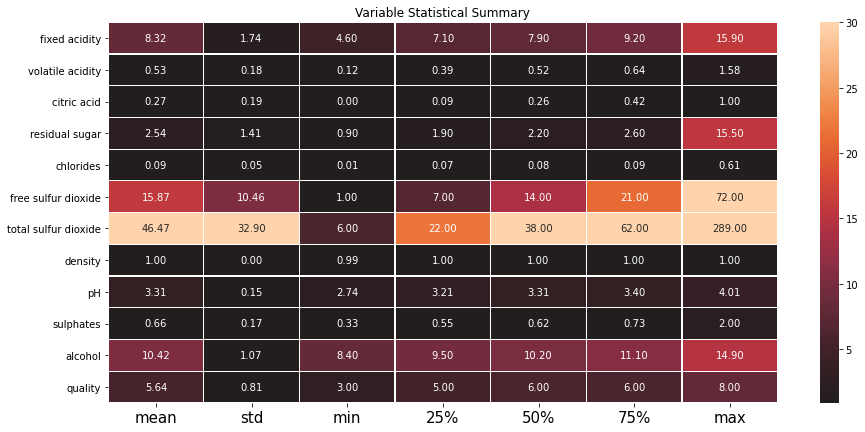

In [668]:
# Visualization of Statistical distribution of Data
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df.describe()[1:].transpose(),2),vmin=.9, vmax=30, center=0,annot=True,fmt='.2f', linewidths=.1, )
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Variable Statistical Summary")
plt.show()

In [669]:
#Check for Skweness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [670]:
# check for duplicate rows
sum(df.duplicated())

240

In [671]:
# Removing duplicate rows
df=df.drop_duplicates()
df.shape

(1359, 12)

In [672]:
# TO check which column Type
    #Target Variable(Categorical)     : quality
    #Predictors Variables (Continuous): All
#Supervised ML Classification Model   
df.nunique()    

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

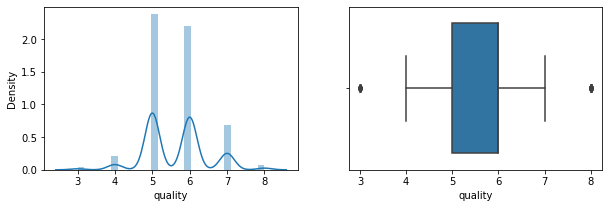

In [673]:
# Creating Graph for-----------Categorical(Target) variable
                                            # Univariate Plot
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(df['quality'])
plt.subplot(1,2,2)
sns.boxplot(df['quality'])
plt.show()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

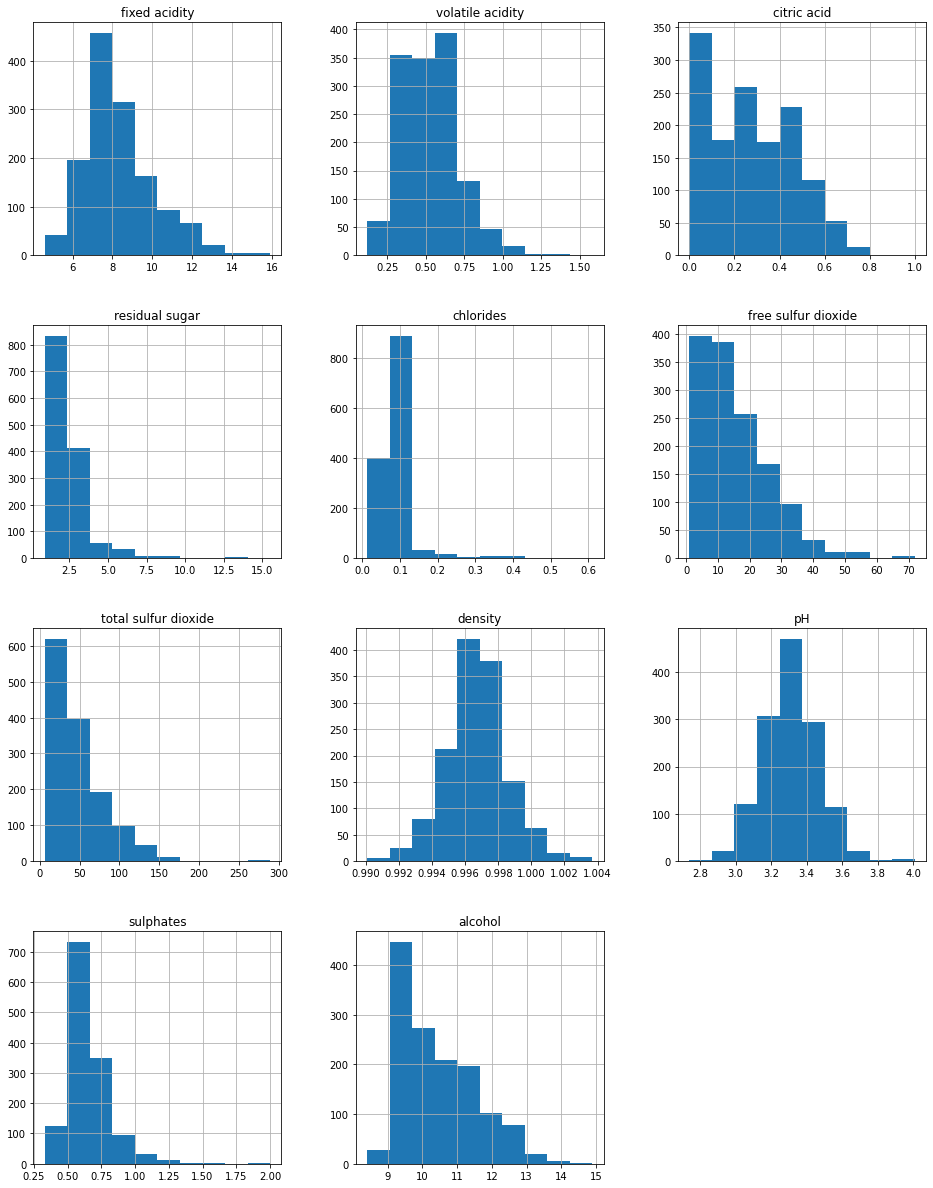

In [674]:
# Creating Graph for------------ Continuous(Predictor) variable          # Univariate Plot 
# All are Selected
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].hist(figsize=(16,21))                   # Shows Slightly Right skewed distribution 



In [675]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,577,577,577,577,577,577,577,577,577,577,577
6,535,535,535,535,535,535,535,535,535,535,535
7,167,167,167,167,167,167,167,167,167,167,167
8,17,17,17,17,17,17,17,17,17,17,17


In [676]:
#converting "Quality" catigorical variable in to binary variable ((3,4,5)=0 Low Quality,(6,7,8)=1 High Quality)
#df.apply(LabelEncoder().fit_transform)
#df.head()
Nquality= {3:0,4:0,5:0,6:1,7:1,8:1}
df['quality'] = df['quality'].replace(Nquality)
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,640,640,640,640,640,640,640,640,640,640,640
1,719,719,719,719,719,719,719,719,719,719,719


<AxesSubplot:xlabel='quality', ylabel='count'>

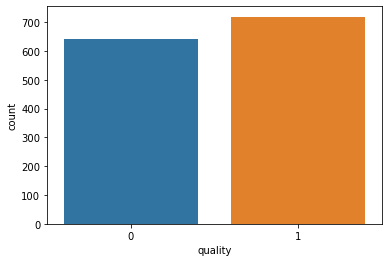

In [677]:
# ploting Target variable
sns.countplot(df['quality'])

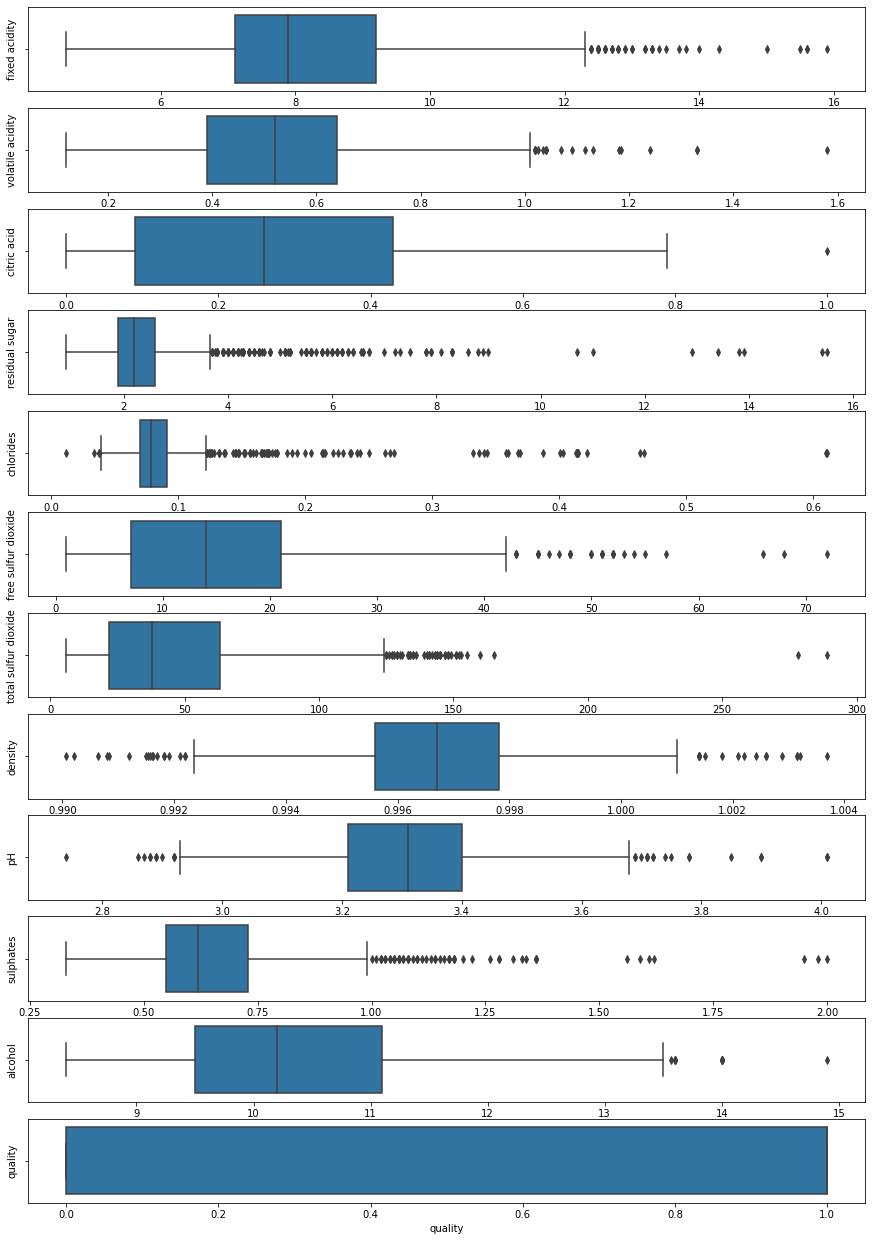

In [679]:
#check for Outliers
num_cols =df.select_dtypes(include = np.number)
plt.figure(figsize=(15,22))
for i,col in enumerate(num_cols,1):
    plt.subplot(12,1,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

In [680]:
#removing outlier by IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(1019, 12)


In [681]:
z=np.abs(zscore(df))
z.shape
threshold=3
print(np.where(z>3))

# Removing Outliers
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(array([ 176,  178,  209,  224,  264,  314,  395,  489,  607,  627,  683,
        734,  966, 1018], dtype=int64), array([ 3,  3,  3,  9,  6, 10,  3,  3,  3,  3,  5,  9,  5,  3],
      dtype=int64))
(1005, 12)


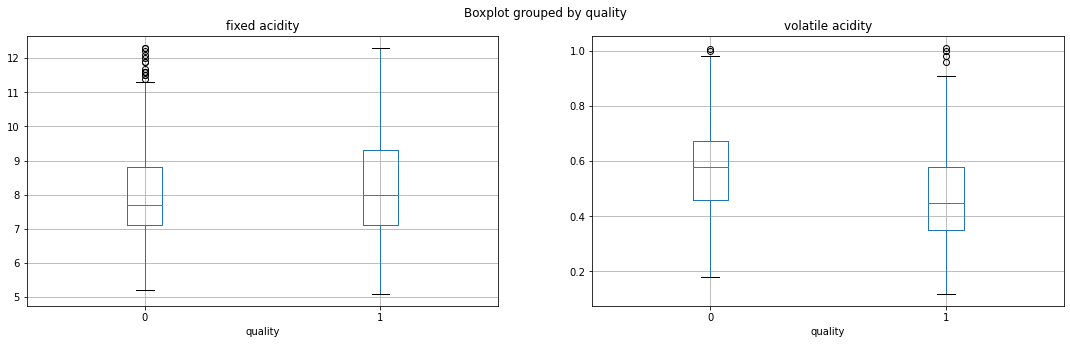

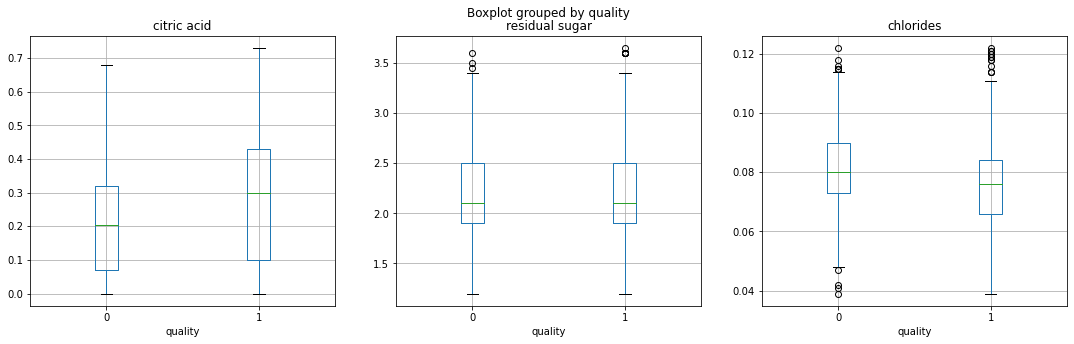

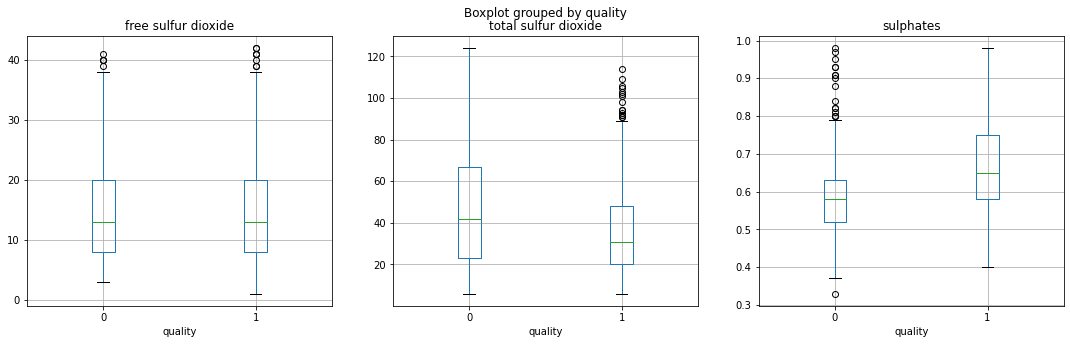

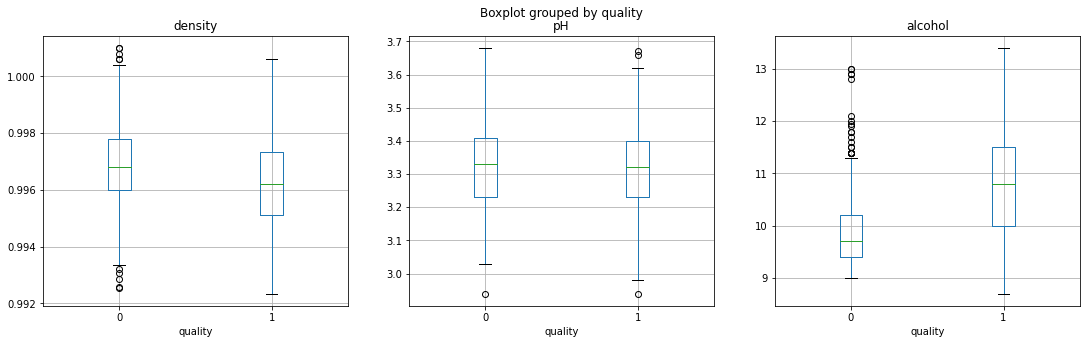

In [682]:
#Categorical Vs Continuous---- Box Plot 
colslst1=['fixed acidity','volatile acidity']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, by='quality', figsize=(2,10), vert=True, ax=pltcan[i])
    
colslst2=['citric acid','residual sugar','chlorides']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst2), figsize=(18,5))
for predcol , i in zip(colslst2, range(len(colslst2))):
    df.boxplot(column=predcol, by='quality', figsize=(2,10), vert=True, ax=pltcan[i])
    
colslst3=['free sulfur dioxide','total sulfur dioxide','sulphates']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst3), figsize=(18,5))
for predcol , i in zip(colslst3, range(len(colslst3))):
    df.boxplot(column=predcol, by='quality', figsize=(2,10), vert=True, ax=pltcan[i])

colslst4=['density','pH','alcohol']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst4), figsize=(18,5))
for predcol , i in zip(colslst4, range(len(colslst4))):
    df.boxplot(column=predcol, by='quality', figsize=(2,10), vert=True, ax=pltcan[i])

In [683]:
# Anova Test 
from scipy.stats import f_oneway
cp=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
sp=[]
for i in cp:
    cg=df.groupby('quality')[i].apply(list)
    av=stats.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')


fixed acidity ------correlated------: 0.0016746555522000014 

volatile acidity ------correlated------: 3.9551265730854103e-22 

citric acid ------correlated------: 1.38156310818002e-08 

residual sugar ------not correlated-----: 0.9221797610861581 

chlorides ------correlated------: 8.397845768482512e-09 

free sulfur dioxide ------not correlated-----: 0.7389197109390935 

total sulfur dioxide ------correlated------: 3.6956929332575006e-13 

density ------correlated------: 3.596361355437401e-10 

pH ------correlated------: 0.37336622211850656 

sulphates ------correlated------: 2.3267376246466112e-34 

alcohol ------correlated------: 1.9135723805435035e-53 



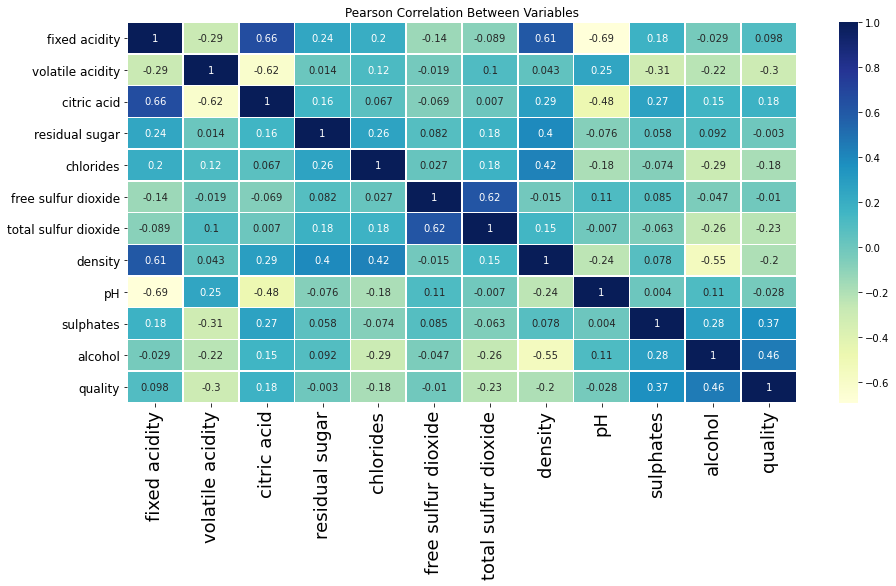

In [684]:
# Check for Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(15,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

In [685]:
#Correlation with the output variable
cor = df.corr()
ctarget = abs(cor['quality'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('weak correlated :',result2)

strong correlated : ['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol', 'quality']
weak correlated : ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH']


In [711]:
# SelectKBest for feature selection
x= df.iloc[:,0:10]  
y = df.iloc[:,-1]

bestft = SelectKBest(score_func=chi2, k=10)
fit = bestft.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

fscores = pd.concat([dfcolumns,dfscores],axis=1)
fscores.columns = ['Specs','Score']
fscores

,Specs,Score
0,fixed acidity,2.621300
1,volatile acidity,4.798366
2,citric acid,4.208322
3,residual sugar,0.000889
4,chlorides,0.093430
5,free sulfur dioxide,0.580929
6,total sulfur dioxide,861.762603
7,density,0.000101
8,pH,0.004198
9,sulphates,2.908413


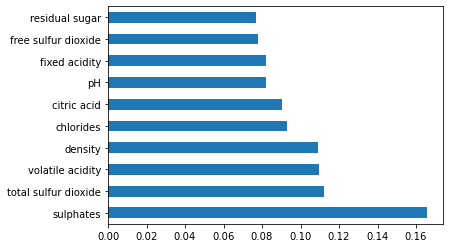

In [713]:
# ExtraTreesClassifier for feature selection 
extraf=ExtraTreesClassifier()
extraf.fit(x,y)

fimp=pd.Series(extraf.feature_importances_,index=x.columns)
fimp.nlargest(10).plot(kind='barh')
plt.show()

In [688]:
newdf=df.drop(["free sulfur dioxide","residual sugar"],axis=1)
newdf.shape

(1019, 10)

In [689]:
# Printing all the column names selected
newdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [690]:
# dividing the dataset into Target and features variables

x = newdf.iloc[:,:9]
y = newdf.iloc[:,-1]

# determining the shape of x and y.
print(x.shape)
print('x :',x.columns)
print(y.shape)
print('y :',y.values)

(1019, 9)
x : Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
(1019,)
y : [0 0 0 ... 1 0 1]


In [691]:
# dividing the dataset in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(764, 9)
(764,)
(255, 9)
(255,)


In [692]:
# Sandardization of data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [693]:
# Logistic Regression Model

clf = LogisticRegression()
LR=clf.fit(x_train,y_train)
pred=LR.predict(x_test)
print("Training accuracy :", clf.score(x_train, y_train))
print("Testing accuracy :", clf.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(md_lr, x , y, cv=10, scoring='f1_weighted')
print('\n10-fold Cross Validation:')
print('Accuracy value :\n',acval)
print('\nFinal Average Accuracy :',round(acval.mean(),2))

Training accuracy : 0.7539267015706806
Testing accuracy : 0.7098039215686275
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       109
           1       0.79      0.67      0.73       146

    accuracy                           0.71       255
   macro avg       0.71      0.72      0.71       255
weighted avg       0.72      0.71      0.71       255

[[83 26]
 [48 98]]
Accuracy on testing data: 0.71

10-fold Cross Validation:
Accuracy value :
 [0.58589113 0.74992039 0.80414851 0.66396605 0.79345693 0.82352941
 0.7351385  0.66071429 0.72495737 0.70525436]

Final Average Accuracy : 0.72


In [694]:
# finding the best parameters for the LR model
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
      'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10, 20,25, 50]
    }]

grid_lr=GridSearchCV(LR, param_grid = param_grid, cv = 3)
grid_lr.fit(x_train, y_train)
grid_lr.best_params_

print("Tuned LR Parameters: {}".format(grid_lr.best_params_)) 
print("Best score is {}".format(grid_lr.best_score_))


Tuned LR Parameters: {'max_iter': 10, 'penalty': 'none', 'solver': 'sag'}
Best score is 0.7447944006999124


In [695]:
# creating a new LR model with these best parameters
md2 = LogisticRegression( random_state = 0,solver = 'liblinear',max_iter=10,multi_class = 'auto')
md2.fit(x_train, y_train)
pred = md2.predict(x_test)
print("\nTraining accuracy :", md2.score(x_train, y_train))
print("Testing accuracy :", md2.score(x_test, y_test))

print(classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(md2, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('\nAccuracy value:',acval)
print('\nFinal Average Accuracy:', round(acval.mean(),2))


Training accuracy : 0.7526178010471204
Testing accuracy : 0.7098039215686275
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       109
           1       0.79      0.67      0.73       146

    accuracy                           0.71       255
   macro avg       0.71      0.72      0.71       255
weighted avg       0.72      0.71      0.71       255

[[83 26]
 [48 98]]
Accuracy on testing data: 0.71

Cross Validation:

Accuracy value: [0.58175206 0.74064517 0.82373303 0.65338332 0.77307777 0.83318803
 0.7351385  0.71275348 0.74390552 0.72134139]

Final Average Accuracy: 0.73


In [696]:
# Support Vector Machines(SVM)

clf = svm.SVC()
SVM=clf.fit(x_train,y_train)
pred=SVM.predict(x_test)
print("Training accuracy :", SVM.score(x_train, y_train))
print("Testing accuracy :", SVM.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(SVM, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy value:',acval)
print('\nFinal Average Accuracy:', round(acval.mean(),2))

Training accuracy : 0.7958115183246073
Testing accuracy : 0.7176470588235294
              precision    recall  f1-score   support

           0       0.64      0.78      0.70       109
           1       0.80      0.67      0.73       146

    accuracy                           0.72       255
   macro avg       0.72      0.73      0.72       255
weighted avg       0.73      0.72      0.72       255

[[85 24]
 [48 98]]
Accuracy on testing data: 0.72

Cross Validation:
Accuracy value: [0.58056981 0.65586728 0.60986559 0.59183968 0.53330825 0.65998459
 0.56243882 0.55964052 0.52551221 0.4903967 ]

Final Average Accuracy: 0.58


In [697]:
# finding the best parameters for the SVC model
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVM, param_grid = param, scoring = 'accuracy', cv = 10)
grid_svc.fit(x_train, y_train)
grid_svc.best_params_

print("Tuned SVC Parameters: {}".format(grid_svc.best_params_)) 
print("Best score is {}".format(grid_svc.best_score_))


Tuned SVC Parameters: {'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}
Best score is 0.751367053998633


In [698]:
# creating a new SVC model with these best parameters
md2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
md2.fit(x_train, y_train)
pred = md2.predict(x_test)
print("\nTraining accuracy :", md2.score(x_train, y_train))
print("Testing accuracy :", md2.score(x_test, y_test))

print(classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(md2, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('\nAccuracy value:',acval)
print('\nFinal Average Accuracy:', round(acval.mean(),2))


Training accuracy : 0.7945026178010471
Testing accuracy : 0.7137254901960784
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       109
           1       0.80      0.66      0.73       146

    accuracy                           0.71       255
   macro avg       0.72      0.72      0.71       255
weighted avg       0.73      0.71      0.72       255

[[85 24]
 [49 97]]
Accuracy on testing data: 0.72

Cross Validation:

Accuracy value: [0.57750692 0.6789359  0.6941483  0.57904063 0.74188288 0.7511946
 0.67874811 0.65468356 0.69581346 0.61155769]

Final Average Accuracy: 0.67


In [714]:
#Decision Trees Model

clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
DTree=clf.fit(x_train,y_train)
pred=DTree.predict(x_test)
print("Training accuracy :", DTree.score(x_train, y_train))
print("Testing accuracy :", DTree.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

#fimp = pd.Series(DTree.feature_importances_, index=pred)
#fimp.nlargest(10).plot(kind='barh')

acval=cross_val_score(DTree, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:\n',acval)
print('\nFinal Average Accuracy :', round(acval.mean(),2))

Training accuracy : 0.8154450261780105
Testing accuracy : 0.6627450980392157
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       109
           1       0.75      0.61      0.67       146

    accuracy                           0.66       255
   macro avg       0.67      0.67      0.66       255
weighted avg       0.68      0.66      0.66       255

[[80 29]
 [57 89]]
Accuracy of the model on Testing Sample Data: 0.66

Cross Validation:
Accuracy values:
 [0.59866988 0.68482487 0.59674925 0.43224837 0.71280333 0.76424918
 0.74539216 0.6407563  0.62745098 0.69215772]

Final Average Accuracy : 0.65


In [715]:
# Random Forest MOdel

clf = RandomForestClassifier()
RF=clf.fit(x_train,y_train)
pred=RF.predict(x_test)
print("Training accuracy :", RF.score(x_train, y_train))
print("Testing accuracy :", RF.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

Accuracy_Values=cross_val_score(RF, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',Accuracy_Values)
print('\nFinal Average Accuracy:', round(Accuracy_Values.mean(),2))


Training accuracy : 1.0
Testing accuracy : 0.7137254901960784
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       109
           1       0.77      0.72      0.74       146

    accuracy                           0.71       255
   macro avg       0.71      0.71      0.71       255
weighted avg       0.72      0.71      0.71       255

[[ 77  32]
 [ 41 105]]
Accuracy on testing data: 0.67

Cross Validation
Accuracy values: [0.54448025 0.73363636 0.64415453 0.61525252 0.76497738 0.76360509
 0.70217255 0.70450636 0.66666667 0.68005863]

Final Average Accuracy: 0.68


In [716]:
# Adaboost 

clf = AdaBoostClassifier()
AB=clf.fit(x_train,y_train)
pred=AB.predict(x_test)
print("Training accuracy :", AB.score(x_train, y_train))
print("Testing accuracy :", AB.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

acval=cross_val_score(AB, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy :', round(acval.mean(),2))


Training accuracy : 0.8036649214659686
Testing accuracy : 0.7098039215686275
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       109
           1       0.77      0.71      0.74       146

    accuracy                           0.71       255
   macro avg       0.71      0.71      0.71       255
weighted avg       0.72      0.71      0.71       255

[[ 78  31]
 [ 43 103]]
Accuracy of the model on Testing Sample Data: 0.71

Cross Validation
Accuracy values: [0.59866988 0.6951136  0.67543232 0.62572954 0.80300424 0.74509804
 0.72058824 0.68775056 0.72591301 0.69797978]

Final Average Accuracy : 0.7


In [717]:
# K-Nearest Neighbor(KNN)

clf = KNeighborsClassifier()
KNN=clf.fit(x_train,y_train)
pred=KNN.predict(x_test)
print("Training accuracy :", KNN.score(x_train, y_train))
print("Testing accuracy :", KNN.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(KNN, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:',acval)
print('\nFinal Average Accuray:', round(acval.mean(),2))


Training accuracy : 0.7931937172774869
Testing accuracy : 0.7215686274509804
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       109
           1       0.77      0.74      0.75       146

    accuracy                           0.72       255
   macro avg       0.72      0.72      0.72       255
weighted avg       0.72      0.72      0.72       255

[[ 76  33]
 [ 38 108]]
Accuracy on testing data: 0.72

Cross Validation:
Accuracy values: [0.64268973 0.64746732 0.57871635 0.5398806  0.53952718 0.57707848
 0.55177285 0.51993259 0.55946113 0.53952034]

Final Average Accuray: 0.57


In [718]:
# Naive Bays

clf = GaussianNB()
NB=clf.fit(x_train,y_train)
pred=NB.predict(x_test)
print("Training accuracy :", NB.score(x_train, y_train))
print("Testing accuracy :", NB.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

acval=cross_val_score(NB,x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy:', round(acval.mean(),2))

Training accuracy : 0.7447643979057592
Testing accuracy : 0.6666666666666666
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       109
           1       0.76      0.61      0.68       146

    accuracy                           0.67       255
   macro avg       0.67      0.68      0.67       255
weighted avg       0.69      0.67      0.67       255

[[81 28]
 [57 89]]
Accuracy of the model on Testing Sample Data: 0.67

Cross Validation:
Accuracy values: [0.57579124 0.66718008 0.6941483  0.52850679 0.6958155  0.81255892
 0.74390552 0.64637377 0.62673454 0.71005883]

Final Average Accuracy: 0.67


In [719]:
#Logistic Regression as the final model 

In [720]:
# Separate Target Variable and Predictor Variables

x = newdf.iloc[:,:9]
y = newdf.iloc[:,-1]

X=x.values
Y=y.values

PScaler=MinMaxScaler()
PScalerFit=PScaler.fit(X)

X=PScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1019, 9)
(1019,)


In [721]:
# Retraining the Model

clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
finalLM=clf.fit(X,y)
print("Accuracy :", finalLM.score(X, y))

paccval=cross_val_score(finalLM, X , y, cv=10, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy of the model:', round(acval.mean(),2))

Accuracy : 0.7487733071638861

Cross Validation
Accuracy values: [0.57579124 0.66718008 0.6941483  0.52850679 0.6958155  0.81255892
 0.74390552 0.64637377 0.62673454 0.71005883]

Final Average Accuracy of the model: 0.67


In [722]:
# Model Saving
import pickle
filename='Wine_Quality.pk1'
pickle.dump(model,open(filename,'wb'))
print("Model Saved")

Model Saved
